
##  Import Required Libraries
---



In [ ]:
import pandas as pd  # Import pandas for data manipulation and handling DataFrames
import numpy as np  # Import numpy for numerical operations
from sklearn.cluster import KMeans  # Import KMeans for clustering (although it's not used in the code)
from sklearn.metrics import silhouette_score  # Import silhouette_score to evaluate clustering results
from sklearn.preprocessing import StandardScaler  # Import StandardScaler to normalize the features
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for advanced plotting (although it's not used in the code)
from scipy.spatial.distance import cdist  # Import cdist for calculating distances (not used in the code)
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine_similarity for computing similarity between samples
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering for hierarchical clustering

## Load and Explore the Dataset
---

In [ ]:
# Load the Wine Quality Dataset
data = pd.read_csv('winequality-red.csv')

# Display the first few rows
print(data.head())

# Inspect the structure and check for missing values
# Check the structure of the dataset and check for missing values
print(data.info())  # Displays summary information about dataset including column types and non-null counts
print(data.isnull().sum())  # Prints the number of missing values in each column

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing
---

In [ ]:
# Drop the target variable
features = data.drop('quality', axis=1)

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Check the scaled data
print(scaled_data[:5])

[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]]


## K-means Clustering with Different Distance Metrics
---

In [ ]:
# Perform Agglomerative Clustering with Euclidean distance
agg_euclidean = AgglomerativeClustering(n_clusters=3, metric='euclidean',  linkage="average")
agg_euclidean_labels = agg_euclidean.fit_predict(scaled_data)

# Evaluate with silhouette score (Euclidean)
euclidean_score = silhouette_score(scaled_data, agg_euclidean_labels)
print(f"Silhouette Score (Euclidean): {euclidean_score}")

Silhouette Score (Euclidean): 0.5631668418422066


In [ ]:
# Perform Agglomerative Clustering using Manhattan distance
agg_manhattan = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage="average")
agg_manhattan_labels = agg_manhattan.fit_predict(scaled_data)

# Evaluate with silhouette score (Manhattan)
manhattan_score = silhouette_score(scaled_data, agg_manhattan_labels)
print(f"Silhouette Score (Manhattan): {manhattan_score}")

Silhouette Score (Manhattan): 0.5597325806675031


In [ ]:
# Compute Cosine similarity for the dataset
cosine_similarities = cosine_similarity(scaled_data)

# Perform Agglomerative Clustering using Cosine similarity
agg_cosine = AgglomerativeClustering(n_clusters=3, metric='precomputed',  linkage="average")
agg_cosine_labels = agg_cosine.fit_predict(1 - cosine_similarities)

# Evaluate with silhouette score (Cosine)
cosine_score = silhouette_score(scaled_data, agg_cosine_labels)
print(f"Silhouette Score (Cosine): {cosine_score}")

Silhouette Score (Cosine): 0.1552374499995812


## Comparison
---

In [ ]:
# Print a comparison of the silhouette scores for all three distance metrics (Euclidean, Manhattan, Cosine)
print("\nComparison of Silhouette Scores:")
print(f"Euclidean Distance: {euclidean_score}")  # Display Euclidean score
print(f"Manhattan Distance: {manhattan_score}")  # Display Manhattan score
print(f"Cosine Distance: {cosine_score}")  # Display Cosine score


Comparison of Silhouette Scores:
Euclidean Distance: 0.5631668418422066
Manhattan Distance: 0.5597325806675031
Cosine Distance: 0.1552374499995812


## Visualization of Clustering Outcomes
---

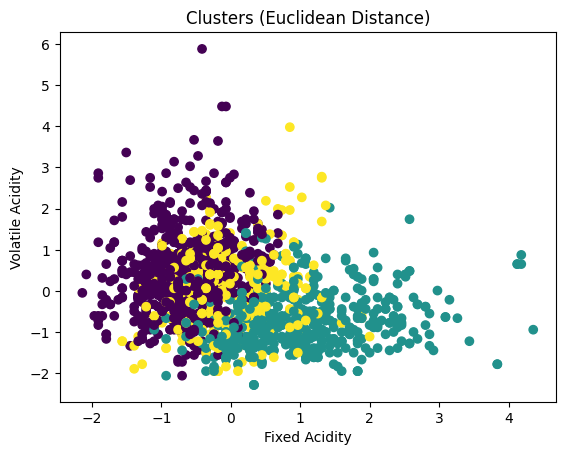

In [ ]:
# Plot clusters with Euclidean distance
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], cmap='viridis')
plt.title('Clusters (Euclidean Distance)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

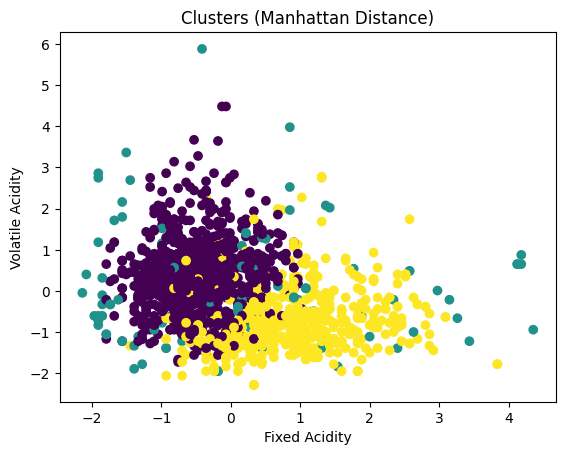

In [ ]:
# Plot clusters with Manhattan distance
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],  cmap='viridis')
plt.title('Clusters (Manhattan Distance)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

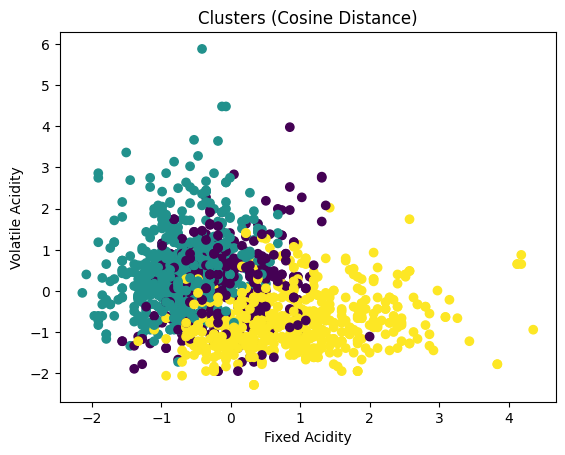

In [ ]:
# Plot clusters with Cosine similarity
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], cmap='viridis')
plt.title('Clusters (Cosine Distance)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()